# Data Generation

The data used in this research comes from news articles published online in newspapers across Latin America regarding Venezuelan migration.

* We ﬁrst selected the **most popular newspapers** of: Colombia, Peru, Chile, Ecuador, Brazil, Argentina, Uruguay, Paraguay and Bolivia
* Next, we gather articles published in the corresponding online sites since **January 2015 until May 2019**. 
* We search newspaper sites using a list of **keywords**: “migracion”, “exodo”, “venezuela”, “venezolanos”, “venezolana”, “venezolano”.
* We build an article corpus, storing **three ﬁelds for each news**: headline, content and publication date. 

``Everything sounds really good, BUT although we conduct a keyword based search, the resulting corpus contains a fraction of articles not related to the topic of interest.``

Therefore, we implemented a **BINARY CLASSIFIER** to decide whether articles are ”migration related” or not.

We classify the documents based on the headline of the new. LSTM and CNN models were computed, but CNN worked better.

| Headline                                                                                          | Class |
|---------------------------------------------------------------------------------------------------|-------|
| ‘El Puma’ recibe Grammy a la excelencia lamentando migración venezolana y destrucción del país    | 0     |
| Miraflores acoge primera expo-feria emprendedora peruana-venezolana                               | 0     |
| Solo la caridad de buenas personas alivia necesidades de migrantes en la ruta Cúcuta- Bucaramanga | 1     |
| Se estima que a diario ingresan a Colombia cerca de 40.600 migrantes del vecino país              | 1     |

### Predictor implementation

We used CNN model, and it was trained with a **200 news** articles corpus, in which 100 were manually labeled as "0" and  the other 100 as "1".
* 0 represent news that are **not related to VENEZUELAN migration**
* 1 represent news tha are **related to VENEZUELAN migration**

The **accuracy was 0.824** and we noticed that some news classified as 0 were really 1. So we decided to train the model again.
This time que labeled the corpus of the documents that were classified as 0.

This second time the model was traned adding **200 news**, were 100 were labeled as "0" and the others as "1".
**Now the accuracy was 0.889**, it improved significantly.

In [ ]:
'''
#import pandas as pd
import threading
import pickle
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

class DeepPredictor(threading.Thread): 
    def __init__(self,name,max_sequence_length):
        threading.Thread.__init__(self)
        self.name = name
        self.model = None
        self.tokenizer = None
        
        self.max_sequence_length = max_sequence_length
        
    def get_token_filename(self):  #get the pretained vectors
        return '.\\' + self.name + '.pickle'

    def get_model_filename(self):  #get the pretrained model
        return '.\\' + self.name + '.hdf5'
    
    def load(self):
        with open(self.get_token_filename(), "rb") as f:
            self.tokenizer = pickle.load(f)
        print('Tokenizer loaded')
        self.model = load_model(self.get_model_filename())
        print('Model loaded')        
    
    def get_data_for_prediction(self,texts):
        print('Calculating sequences for: ',len(texts),' texts')
        sequences = self.tokenizer.texts_to_sequences(texts)  # list of vectors of the news to classify
        print('There are : ',len(sequences),' created')
        return sequences
    
    def predict(self,texts):        
        self.load()        
        sequences = self.get_data_for_prediction(texts)
        print('Creating pad sequences: ',len(sequences))
        data = pad_sequences(sequences,maxlen=self.max_sequence_length) # convert the list of vector into an array
        print('Pads created : ', data.shape)
        print('Now predicting ', len(data))
        predictions = self.model.predict(data) 
        print('Predictions are completed ', len(predictions))
        return predictions
    
    def run(self,texts):
        self.predict(texts)
'''

## Loading the documents

In [1]:
import pandas as pd

For each year we have the following information:
* **url**: link of the article
* **description:** news content
* **headline:** news title
* **date:** date when the news were released
* **anio:** we extract the year when the news were released from date

In [2]:
noticias_2015 = pd.read_csv("doc_2015.csv")
noticias_2015.head(2)

,url,description,headline,date,anio
0,https://www.elespectador.com/noticias/elmundo/...,En 2004 se aprobaron 1.464 visas de trabajo o ...,Inician deportaciones de centroamericanos,7 ene. 2015,2015
1,https://elperiodicodemexico.com/nota.php?id=80...,BUDAPEST/GINEBRA (Reuters) - El primer ministr...,"Primer ministro húngaro critica ""rebelión"" de ...",11 sep. 2015,2015


For the purpose of uncovering the most important topics, we took only the content of the news **(description)**. This is what we are going to analyse.

In [3]:
noticias_2015 = noticias_2015["description"]
noticias_2016 = pd.read_csv("doc_2016.csv")["description"]
noticias_2017 = pd.read_csv("doc_2017.csv")["description"]
noticias_2018 = pd.read_csv("doc_2018_3.csv")["description"]
noticias_2019 = pd.read_csv("doc_2019.csv")["description"]

In [4]:
noticias_2015.head(2)

0    En 2004 se aprobaron 1.464 visas de trabajo o ...
1    BUDAPEST/GINEBRA (Reuters) - El primer ministr...
Name: description, dtype: object

# WordCloud

In [6]:
from nltk.corpus import stopwords

In this context we added more words to the set of StopWords in order to avoid some irrelevant information.

In [7]:
stopWords = set(stopwords.words('spanish'))
stopWords.update(("venezuela","venezolanos","venezolana","venezolano","país","países","migrantes","migrante","arlyn",
                  "titulartérminos","paute","trujillo","trujilla","puede","pueden","2017","2018","2019","2015","2016",
                  "tps","álvaro","nico","matheus","yenery","personas","acá","migración","dijo","rohingyas","si","art",
                  "dice","ver","gustavo","tarde","jorge","rodríguez","natural","ptp","oim","pep","deportes","nacionalcom",
                  "http","wwwel", "deportivos","Alejandro","atención","finalidad","santa","malas","indicó","cinco","mil", 
                  "bien","mismo","luego","hacia","guaidó","roraima","parte","evelyn","colombia","ecuador","perú","crisis",
                  "méxico","aquí","ves","vez","extorsiónzoyatla","vecino","nicolás","2014","stein","últimos","chile","dos",
                  "lunes","martes","miércoles","jueves","viernes","sábado","16000","maduro","hace","60","según","uribe",
                  "vegaslos","amb","bangladesh","myanmar","martínez","per","primero","octubre","31","además","krüger","paso",
                  "número","martínez","llegó","allá","decir","veces","ocho","situación","forma","debe","gente","pues","quito",
                  "solo","diarios","días","meses","orgánica","moreno","ibarra","caracas","masivasel","27808","rita",
                  "pacaraima","munici","textos","cómo","cúcuta","2017","según","art","60","de","la","ley","tantos","es",
                  "acción","posible","chapo","sucederlo","russo","orgánica","comunicación","contenidos","se","identifican",
                  "clasifican","i","informativos","o","opinión","f","formativos","educativos","culturales","e",
                  "entretenimiento","d","deportivos","recibe","nuestro","newsletter","agregó","aseguró","diariamente",
                  "registrándote","email","mantente","informado","noticias","relevantes","día","empresa","editora",
                  "copyright","grupo","todos","derechos","reservados","mantente","siempre","informado","disfruta","cientos",
                  "beneficios","exclusivos","club","comercio","derechos","aunque","Táchira","puntos","cruzan","simón",
                  "muchos","atender","rayados","juego","invicto","régimenel","frente","explicó","reservados","grupo",
                  "queda","prohibida","reproducción","total","parcial","por","cualquier","medio","todos","contenidos",
                  "sin","autorización","expresa","términos","condiciones", "tiempo","casa","editorial","dicho","títulos",
                  "prohibida","50","cifra","reproducción","total","parcial","así","como","su","traducción","cualquier",
                  "idioma","sin","autorización","escrita","titular","todas","noticias","principales","colombia","mundo",
                  "ser","año","años","15","gran","trata","temas","sido","señaló","entvpolítica","rif","entvpolítica","40",
                  "iberonews","ca","cookies","402838298prohibida","permite","editores","web","aviso","avisamos", "términos",
                  "uso","https","www","paute","nosotros","habeas","contáctenos","mapa","data","síguenosel","eltiempocom",
                  "sa","lado","puede","tras","cada","lunes","juan","hacer","mayor","menos","mientras", "va","cuatro",
                  "domingo","13","través","com","castillo","deben","sigue","diario","nuevo","roger","semana","sino","tan",
                  "Perez","Pérez","casi","buscar","tres","tener","ahora","hora","hoy","publicadoscolinas","auquisamaña",
                  "apreciará","fluido","acotarse","debido","después","sábado","claridad","sumar","christian","jueves",
                  "cita","recibió"))

In [8]:
from wordcloud import WordCloud

We made a function to generate the word cloud

In [9]:
def generate_wordcloud(corpus):
    # Join the different processed titles together.
    long_string = ','.join(list(corpus.values))
    # Create a WordCloud object
    wordcloud = WordCloud(stopwords = stopWords,
                          background_color="white",
                          max_words=75,
                          contour_width=3, 
                          contour_color='steelblue',
                          random_state=20)
    # Generate a word cloud
    return wordcloud.generate(long_string)

The venezuelan huge exodus started at 2015, and as we can see the word **colombian** appeared the most in this year news.

Reports of Unilateral Organisms as the ONU, ACNUR and others, shows that this year **thousand of venezuelan people moved to Colombia**, that is because it is a **border country**.

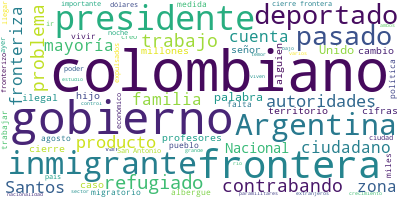

In [10]:
generate_wordcloud(noticias_2015).to_image()

Then in 2016 words as **goverment**, **frontier** and **work** appeared the most. 

This is because the lack of work places.
This is because most of the Venezuelan citizens were dissatisfied with their current president, and the shortage of jobs was already shocking the population. Together with the problems caused by having to cross the border.

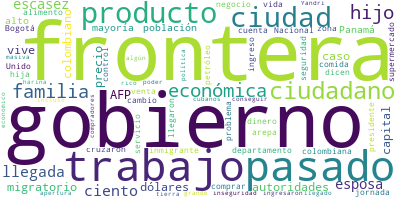

In [11]:
generate_wordcloud(noticias_2016).to_image()

In 2017 appeared words as: **child/son** and **family**.

After two years in which the problem persists, families were affected, fathers and mothers who go out to look for opportunities leave behind a family that needs them.

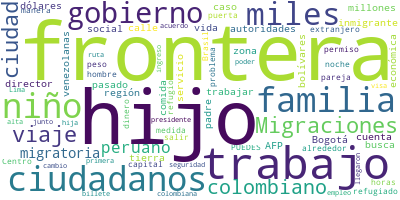

In [12]:
generate_wordcloud(noticias_2017).to_image()

# Preparing Data for Topic Modeling

In [13]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

We want to remove punctuation and convert words to lowercase, so we made a function for doing this.

In [14]:
import re

In [15]:
def remove_punctuation(corpus):
    # Remove punctuation
    news = corpus.map(lambda x: re.sub('[,\.!?|();]', '', x))
    # Convert the titles to lowercase
    news = news.map(lambda x: x.lower())
    return news

We also want a function to compute TfidfVectorizer was made.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
def TfidfVectorizer_per_year(clean_corpus):
    vectorizer = TfidfVectorizer(max_features=2000,
                                 min_df=10,
                                 stop_words=stopWords)
    X = vectorizer.fit_transform(clean_corpus)
    return X,vectorizer

In [18]:
noticias2015_clean = remove_punctuation(noticias_2015)
noticias2016_clean = remove_punctuation(noticias_2016)
noticias2017_clean = remove_punctuation(noticias_2017)
noticias2018_clean = remove_punctuation(noticias_2018)
noticias2019_clean = remove_punctuation(noticias_2019)

In [19]:
X_2015, vectorizer_2015 = TfidfVectorizer_per_year(noticias2015_clean)
X_2016, vectorizer_2016 = TfidfVectorizer_per_year(noticias2016_clean)
X_2017, vectorizer_2017 = TfidfVectorizer_per_year(noticias2017_clean)
X_2018, vectorizer_2018 = TfidfVectorizer_per_year(noticias2018_clean)
X_2019, vectorizer_2019 = TfidfVectorizer_per_year(noticias2019_clean)

C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['alejandro', 'perez', 'pérez', 'táchira'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


## Latent Dirichlet Allocation (LDA)

We are goint to print topics from different years, so a function was made to modularized this part of the code.

In [20]:
# Helper function to print topics
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % (topic_idx+1))
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [21]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [22]:
# Create and fit the LDA model
def lda_topics(X,topics,words,vectorizer):
    lda = LDA(n_components=topics,
              n_jobs=-1,
              random_state=10)
    lda.fit(X)
    # Print the topics found by the LDA model
    print("Topics found via LDA:")
    print_topics(lda, vectorizer, number_words)

In [23]:
number_topics = 5
number_words = 10

In [24]:
lda_topics(X_2015,number_topics,number_words,vectorizer_2015)

Topics found via LDA:

Topic #1:
autoridades colombianos agosto recibir gobierno ciudadanos información seguridad deportados frontera

Topic #2:
frontera seguridad autoridades unión mayoría recibir información mejor zona viven

Topic #3:
información unión pasado cambio territorio mejor agosto frontera productos zona

Topic #4:
mayoría gobierno territorio trabajo ciudadanos viven cambio autoridades presidente pasado

Topic #5:
colombianos frontera presidente santos pasado contrabando fronteriza cierre productos deportados


In [25]:
lda_topics(X_2016,number_topics,number_words,vectorizer_2016)

Topics found via LDA:

Topic #1:
presidente vive pasado encuentra gobierno mejor finanzas conocimientos capital trabajo

Topic #2:
ciudad trabajo llegada pasado capital seguridad económica escasez alimentos vive

Topic #3:
frontera información recibir prueba ciudadanos encuentra cosas gobierno finanzas conocimientos

Topic #4:
pasado presidente vive capital habitantes recibir gobierno encuentra mejor finanzas

Topic #5:
alimentos gobierno escasez económica frontera ciudadanos comprar pasado presidente vive


In [26]:
lda_topics(X_2017,number_topics,number_words,vectorizer_2017)

Topics found via LDA:

Topic #1:
trabajo niños frontera ciudad gobierno nacional migraciones viaje autoridades ciudadanos

Topic #2:
temporal ciudadanos vida pasado migratoria permiso presidente unión trabajar permanencia

Topic #3:
miles encuentran director ciudad ciudadanos pasado económica brasil internacional peruanos

Topic #4:
migraciones permiso migratoria permanencia ciudadanos temporal peruanos nacional miles pasado

Topic #5:
peruanos trabajo mayoría busca vida económica ciudadanos dinero trabajar internacional


# Nonnegative Matrix Factorization (NMF)

In [27]:
from sklearn.decomposition import NMF

Creating a function to print NMF topics.

In [28]:
# print the topics
def print_topics_nmf(components,idx_to_word):
    for i, topic in enumerate(components): 
        text = "Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word[topic.argsort()[-10:]]]))
        print(text)

In [29]:
import numpy as np

In [30]:
def nmf_topics(vectorizer,topics,X):
    idx_to_word = np.array(vectorizer.get_feature_names())
 
    # apply NMF 
    nmf = NMF(n_components=topics,
              solver="mu",
              random_state=10) 
    W = nmf.fit_transform(X) 
    H = nmf.components_

    print_topics_nmf(H,idx_to_word)

In [31]:
n_topics = 5

In [33]:
nmf_topics(vectorizer_2015,n_topics, X_2015)

Topic 1: productos,cierre,ciudadanos,presidente,deportados,colombiano,contrabando,frontera,gobierno,colombianos
Topic 2: seguridad,autoridades,pasado,cambio,viven,territorio,trabajo,ciudadanos,mayoría,gobierno
Topic 3: deportados,pasado,unión,mejor,ciudad,recibir,seguridad,frontera,información,autoridades
Topic 4: ciudad,zona,frontera,deportados,unión,pasado,cierre,presidente,fronteriza,santos
Topic 5: fronteriza,unión,ciudad,mejor,cambio,recibir,trabajo,productos,pasado,agosto


In [34]:
nmf_topics(vectorizer_2016,n_topics, X_2016)

Topic 1: llegada,conocimientos,finanzas,gobierno,cosas,encuentra,prueba,recibir,frontera,información
Topic 2: pasado,comprar,vive,presidente,seguridad,trabajo,alimentos,gobierno,escasez,económica
Topic 3: llegada,comprar,seguridad,ciudadanos,habitantes,vive,pasado,capital,ciudad,trabajo
Topic 4: encuentra,recibir,pasado,capital,ciudad,llegada,comprar,alimentos,ciudadanos,frontera
Topic 5: encuentra,capital,vive,habitantes,escasez,frontera,gobierno,recibir,presidente,pasado


In [35]:
nmf_topics(vectorizer_2017,n_topics, X_2017)

Topic 1: incluso,frontera,migraciones,brasil,trabajo,director,dinero,miles,autoridades,ciudad
Topic 2: peruanos,trabajar,unión,nacional,migraciones,temporal,migratoria,permanencia,ciudadanos,permiso
Topic 3: internacional,migraciones,ingreso,económica,busca,dinero,trabajar,mayoría,trabajo,peruanos
Topic 4: trabajar,internacional,presidente,cifras,encuentran,cuenta,viaje,unión,nacional,niños
Topic 5: presidente,cuenta,económica,ciudadanos,viaje,dólares,frontera,gobierno,vida,pasado


# Semantically related issues

Using the word embedding technique, we analyze the semantic evolution of four topics found in LDA and NMF.

####  Semantic Topics for food, children, violence and work 

We did a temporal analysis of four topics:

**1. Food:** 
    * In 2015 there is a shortage of essential food, then in 2016 there are looting due to the increase in prices of products. 
    * In 2017 & 2018 there is a resection in the country that causes that not only food is scarce but also medicine. 
    * In 20187, even water that is a fundamental element for life is difficult to obtain.
    
**2. Children**
    * In 2015, there is growing concern about child migration. 
    * In 2016, not only children and men cross, but also pregnant women. 
    * In 2017, migrants of all ages are registered, which is why in 2018 the migration of adolescents and the elderly is denoted, the crisis is so serious that even whole families seek to leave Venezuela. 
    * In 2019, these most vulnerable people are the ones who suffer the most: pregnant women, minors, etc. 

| 2015         | 2016      | 2017       | 2018       | 2019          |
|--------------|-----------|------------|------------|---------------|
|                           **FOOD**                                 |
| shortage     | medicine  | shortage   | medicine   | medicine      |
| basics       | sacking   | ants       | shortage   | shortage      |
| sell         | necesity  | medicine   | products   | cloud         |
| inflation    | price     | suffer     | recession  | water         |
|                           **CHILDREN**                             | 
| deport       | crossed   | crossed    | girls      | pregnant      |
| told         | women     | women      | teenagers  | parents       |
| mountains    | pregnant  | ages       | elders     | underage      |
| concern      | grateful  | registers  | adults     | vulnerability |
|                           **VIOLENCE**                             | 
| serious      | requests  | chile      | exiled     | xenophobia    |
| neglect      | poor      | newspapers | chase      | rape          |
| relative     | increased | listen     | inequality | generalized   |
| poor         | published | increased  | save       | exploitation  |
|                           **WORK**                                 | 
| wife         | search    | ask        | workers    | group         |
| oportunities | arrive    | hard       | pilots     | accept        |
| retired      | went-back | found      | ship       | possibilities |
| working      | sold      | lack       | travel     | metropolis    |

<img src="semanticTopics.PNG" width ="350" height="400"/>